# Naive Bayes model

In [17]:
# Importing libraries

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [18]:
# Reading the data from the Pre-processed file
data = pd.read_csv('cleaned_labelEncoded_PCA_adult.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,income
0,0.585612,-0.708951,-0.394252,0.723986,-1.186807,-0.706480,-2.813949,-0.829748,1.108792,-0.571561,<=50K
1,0.666157,-0.794009,0.128526,-0.026741,-1.777371,-1.184097,-1.460062,-0.316101,0.109311,-1.100819,<=50K
2,1.003859,-0.362138,0.025417,-0.306432,0.475741,-0.694615,0.313164,0.254932,-0.710069,0.140799,<=50K
3,0.759383,1.577882,1.518623,-0.400051,-0.745707,-1.069425,0.678210,-0.063624,0.217335,-2.149402,<=50K
4,-2.779713,3.008856,3.935919,0.275650,0.486809,1.121522,-0.688891,0.225540,-0.897165,2.750224,<=50K


# Classification

In [19]:
# Naive Bayes Classification

# Extract features and target variable from the dataset
X = data.drop(columns=['income'])  # Features (excluding 'income' column)
y = data['income']  # Target variable

# Convert categorical variables into numerical representation (One-Hot Encoding)
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)


Accuracy: 0.7729939125622579
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.86      6830
        >50K       0.60      0.21      0.31      2205

    accuracy                           0.77      9035
   macro avg       0.69      0.58      0.59      9035
weighted avg       0.74      0.77      0.73      9035



# ROC Curve

ROC AUC Score: 0.7617169151701676


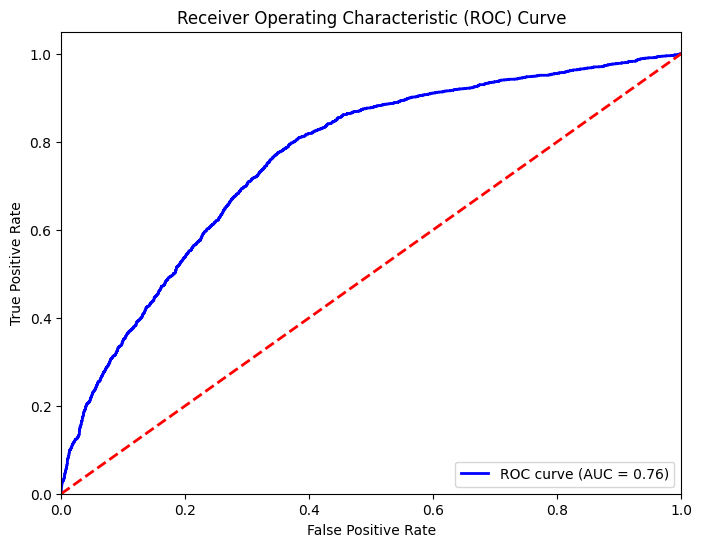

In [20]:
# Importing necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_probs = nb_model.predict_proba(X_test)[:, 1]

# Convert target variable to binary labels
y_test_binary = (y_test == '>50K').astype(int)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test_binary, y_probs)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Confusion Matrix

Confusion Matrix:
[[6526  304]
 [1747  458]]


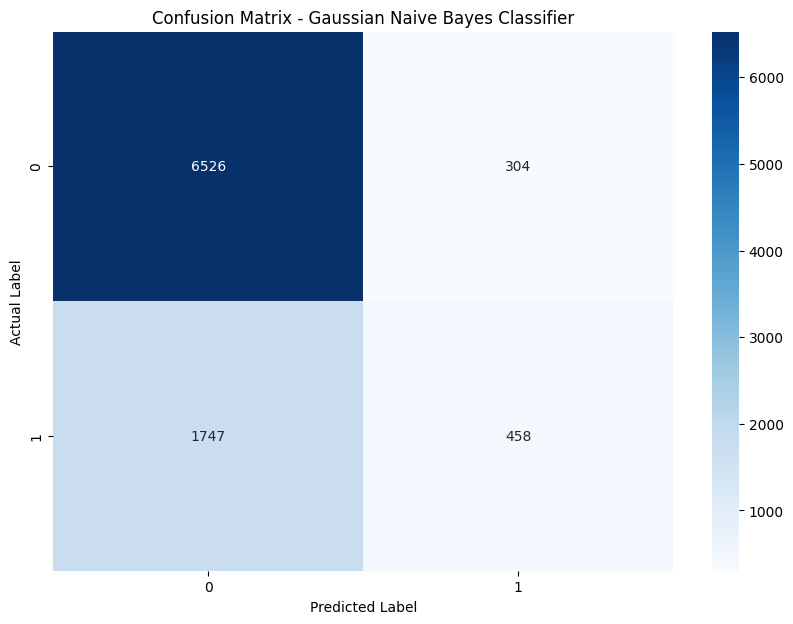

In [21]:
from sklearn.metrics import confusion_matrix

# Construct confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gaussian Naive Bayes Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
